In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential,activations,callbacks
from tensorflow.keras.applications import VGG16

In [7]:
model = VGG16(weights="imagenet", include_top=True)

553467904/553467096 [==============================] - 1090s 2us/step


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
layer_info = {}
layer_weights = {}

## maps layer name to characteristics
for info in model.layers:
    layer_info[info.name] = info.get_config()

## maps every layer name to its corresponding weights
for weight in model.layers:
    layer_weights[weight.name] = weight.get_weights()

In [29]:
print(layer_info['block5_conv1'])

{'name': 'block5_conv1', 'trainable': True, 'dtype': 'float32', 'filters': 512, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


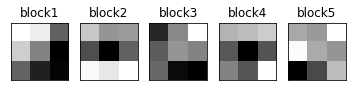

In [28]:
layers = model.layers
layer_ids = [1,4,7,11,15]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [35]:
layer_ids = [1,5,7,11,15]
for i in range(5):
    print(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0])

[[ 0.42947057  0.373467   -0.06136011]
 [ 0.27476987  0.03868078 -0.36722335]
 [-0.05746817 -0.26224968 -0.35009676]]
[[-0.00230124 -0.00138295 -0.00099158]
 [-0.00672968 -0.00456148 -0.00281609]
 [-0.01080654 -0.00832169 -0.00575948]]
[[ 0.16621928  0.212008   -0.00591699]
 [ 0.19920252 -0.02594107 -0.09849164]
 [-0.01115857 -0.10211428  0.02734016]]
[[-0.01245381 -0.01201765 -0.01130973]
 [-0.01660376 -0.02052477 -0.01672917]
 [-0.01456514 -0.01663202 -0.00899161]]
[[-0.00060689 -0.00152491  0.00468026]
 [ 0.0043825  -0.00051713 -0.00177406]
 [-0.01081364 -0.00631402  0.00067127]]
